# Programming Assignment 5 - Build your own Conventional Neural Network

After completing this project, you will be able to do the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.

- **574 Only**: Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [78]:
import numpy as np
## please add the essential libraries

# YOUR CODE HERE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [79]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
train_data_dir      = 'pictures/train'
validation_data_dir = 'pictures/val'
test_data_dir       = 'pictures/test'

epochs = 10
batch_size = 16

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data

datagen = ImageDataGenerator(
    rescale=1./255,
    zca_epsilon=1e-06,
#     rotation_range=0.2,
#     width_shift_range=0.05,
#     height_shift_range=0.05,
#     shear_range=0.05,
#     zoom_range=0.05,
#     horizontal_flip=True,
#     fill_mode='nearest'

    )

# Your Code HERE

train_datagen = datagen.flow_from_directory(train_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
train_images, train_labels = next(train_datagen)

#valid_generator = 
val_datagen = datagen.flow_from_directory(validation_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
val_images, val_labels = next(val_datagen)

# test_generator  = 
test_datagen = datagen.flow_from_directory(test_data_dir, target_size=(img_height, img_width), batch_size=batch_size, class_mode='categorical')
test_images, test_labels = next(test_datagen)

# please print the number of samples in each folder 
# Your Code HERE
train_sample = train_datagen.samples
val_sample = val_datagen.samples
test_sample = test_datagen.samples

print(train_images.shape)

Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
(16, 224, 224, 3)


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [80]:
# build conv2D CNN model, be careful with softmax and output layers is 10
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

# define the input shape of Convolutional Neural Network
# Your Code HERE
input_shape = (img_height, img_width, 3)
num_classes = train_labels[0].shape[0]

print(f'Input shape : {input_shape}')


# define the Convolutional Neural Network
# Your Code HERE
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(10,activation ="softmax"))


model.summary()

Input shape : (224, 224, 3)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_39 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_40 (MaxPoo

In [81]:
# Compiling the model and training including the files of compile and fit
#Your code 
#model.compile()
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=0.01), metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

#Train the model with training and validation set
#model.fit()
#, callbacks=[callback]
hist = model.fit(train_datagen, epochs=epochs, validation_data=val_datagen)

Epoch 1/10


2022-05-14 13:40:05.725965: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 1.7644 - accuracy: 0.3858

2022-05-14 13:40:34.793308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 34s 127ms/step - loss: 1.7644 - accuracy: 0.3858 - val_loss: 0.9035 - val_accuracy: 0.7112
Epoch 2/10
261/261 [==============================] - 32s 124ms/step - loss: 0.4845 - accuracy: 0.8396 - val_loss: 0.4864 - val_accuracy: 0.8534
Epoch 3/10
261/261 [==============================] - 32s 123ms/step - loss: 0.1483 - accuracy: 0.9588 - val_loss: 0.4455 - val_accuracy: 0.8736
Epoch 4/10
261/261 [==============================] - 32s 123ms/step - loss: 0.0616 - accuracy: 0.9852 - val_loss: 0.4567 - val_accuracy: 0.9052
Epoch 5/10
261/261 [==============================] - 32s 123ms/step - loss: 0.0264 - accuracy: 0.9914 - val_loss: 0.4298 - val_accuracy: 0.8951
Epoch 6/10
261/261 [==============================] - 32s 122ms/step - loss: 0.0040 - accuracy: 0.9995 - val_loss: 0.5833 - val_accuracy: 0.8836
Epoch 7/10
261/261 [==============================] - 34s 130ms/step - loss: 8.1042e-04 - accuracy: 1.0000 - val_loss: 0.5276 - val_accuracy:

##Test

In [82]:
# Test the model on a testing dataset
# Your Code HERE
score = model.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Best so far 
# Test accuracy: 0.3


Test loss: 1.083777666091919
Test accuracy: 0.875


2022-05-14 13:45:32.021987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [83]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D
from tensorflow.python.keras import regularizers

# Your code HERE

input_shape = input_shape = (img_height, img_width, 3)
num_classes = train_labels[0].shape[0]

print(f'Input shape : {input_shape}')


# define the Convolutional Neural Network
# Your Code HERE
model_l1 = keras.Sequential()
model_l1.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                    input_shape=input_shape, kernel_regularizer='l1'))
model_l1.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', kernel_regularizer='l1'))
model_l1.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid', kernel_regularizer='l1'))
model_l1.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l1.add(Flatten())
model_l1.add(Dense(64,activation ="relu"))
model_l1.add(Dense(128,activation ="relu"))
model_l1.add(Dense(128,activation ="relu"))
model_l1.add(Dense(10,activation ="softmax"))


model_l1.summary()


Input shape : (224, 224, 3)
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_43 (MaxPoo

In [84]:
# Compiling the model and training including the files of compile and fit
#Your code 
#model.compile()
model_l1.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

#Train the model with training and validation set
#model.fit()
hist_l1 = model_l1.fit(train_datagen, epochs=epochs, validation_data=val_datagen)

Epoch 1/10


2022-05-14 13:45:32.554229: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 4.0545 - accuracy: 0.7107

2022-05-14 13:46:02.431204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 35s 131ms/step - loss: 4.0545 - accuracy: 0.7107 - val_loss: 1.0793 - val_accuracy: 0.8161
Epoch 2/10
261/261 [==============================] - 34s 130ms/step - loss: 0.3894 - accuracy: 0.9693 - val_loss: 0.8963 - val_accuracy: 0.8247
Epoch 3/10
261/261 [==============================] - 33s 127ms/step - loss: 0.2611 - accuracy: 0.9945 - val_loss: 0.7683 - val_accuracy: 0.8412
Epoch 4/10
261/261 [==============================] - 33s 127ms/step - loss: 0.2139 - accuracy: 0.9990 - val_loss: 0.7879 - val_accuracy: 0.8455
Epoch 5/10
261/261 [==============================] - 33s 126ms/step - loss: 0.2002 - accuracy: 0.9995 - val_loss: 0.7128 - val_accuracy: 0.8319
Epoch 6/10
261/261 [==============================] - 35s 133ms/step - loss: 0.3319 - accuracy: 0.9638 - val_loss: 0.9045 - val_accuracy: 0.8305
Epoch 7/10
261/261 [==============================] - 34s 129ms/step - loss: 0.1921 - accuracy: 0.9993 - val_loss: 0.7333 - val_accuracy: 0.8

Test loss: 1.2191401720046997
Test accuracy: 0.875


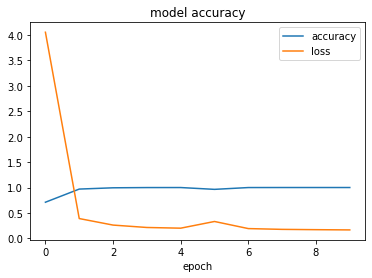

In [104]:
# Test the model on a testing dataset
# Your Code HERE
import matplotlib.pyplot as plt

score = model_l1.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Best so far 
# Test accuracy: 0.625
plt.plot(hist_l1.history['accuracy'])
plt.plot(hist_l1.history['loss'])
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [86]:
#please redefine your model and set the L2 Regularization in the layer of Conv 2D

# Your code HERE

# please redefine your model with setting the L1 Regularization in the layer of Conv 2D

# Your code HERE

print(f'Input shape : {input_shape}')


# define the Convolutional Neural Network
# Your Code HERE
model_l2 = keras.Sequential()
model_l2.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                    input_shape=input_shape, kernel_regularizer='l2'))
model_l2.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same', kernel_regularizer='l2'))
model_l2.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l2.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid', kernel_regularizer='l2'))
model_l2.add(MaxPool2D(pool_size=(2, 2), strides=2))
model_l2.add(Flatten())
model_l2.add(Dense(64,activation ="relu"))
model_l2.add(Dense(128,activation ="relu"))
model_l2.add(Dense(128,activation ="relu"))
model_l2.add(Dense(10,activation ="softmax"))

model_l2.summary()


Input shape : (224, 224, 3)
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 111, 111, 64)      18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 55, 55, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_46 (MaxPoo

In [87]:
# Compiling the model and training including the files of compile and fit
#Your code 
#model.compile()
model_l2.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

#Train the model with training and validation set
#model.fit()
hist_l2 = model_l2.fit(train_datagen, epochs=epochs, validation_data=val_datagen)


Epoch 1/10


2022-05-14 13:51:10.012405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 0.9462 - accuracy: 0.7445

2022-05-14 13:51:39.606369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 34s 129ms/step - loss: 0.9462 - accuracy: 0.7445 - val_loss: 0.8233 - val_accuracy: 0.8132
Epoch 2/10
261/261 [==============================] - 33s 128ms/step - loss: 0.1339 - accuracy: 0.9811 - val_loss: 0.8671 - val_accuracy: 0.8218
Epoch 3/10
261/261 [==============================] - 33s 128ms/step - loss: 0.0847 - accuracy: 0.9864 - val_loss: 0.7928 - val_accuracy: 0.8628
Epoch 4/10
261/261 [==============================] - 33s 128ms/step - loss: 0.0310 - accuracy: 0.9995 - val_loss: 0.6347 - val_accuracy: 0.8614
Epoch 5/10
261/261 [==============================] - 33s 128ms/step - loss: 0.0318 - accuracy: 0.9969 - val_loss: 0.8482 - val_accuracy: 0.8534
Epoch 6/10
261/261 [==============================] - 33s 128ms/step - loss: 0.0850 - accuracy: 0.9844 - val_loss: 0.5634 - val_accuracy: 0.8570
Epoch 7/10
261/261 [==============================] - 33s 128ms/step - loss: 0.0435 - accuracy: 0.9945 - val_loss: 0.8934 - val_accuracy: 0.8

Test loss: 1.1291062831878662
Test accuracy: 0.8125


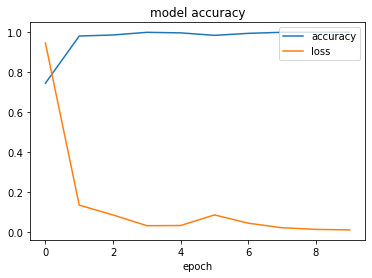

In [105]:
# Test the model on a testing dataset
# Your Code HERE
score = model_l2.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Best so far 
# Test accuracy: 0.625
plt.plot(hist_l2.history['accuracy'])
plt.plot(hist_l2.history['loss'])
plt.xlabel('epoch')
plt.title('model accuracy')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

In [109]:
# load pre-trained resnet 50 from libarary
# your Code HERE
resnet50 = keras.applications.ResNet50(
    weights="imagenet",
    input_shape=(img_height, img_width, 3),
    include_top=False
)

In [112]:
# Fine-tune the model to fit our project  
# your Code HERE
inputs = keras.Input(shape=(img_height, img_width, 3))
x = resnet50(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)
y = keras.layers.Dense(128, activation='relu')(x)
y = keras.layers.Dense(64, activation='relu')(y)
outputs = keras.layers.Dense(num_classes, activation='softmax')(y)


model_resnet50 = keras.Model(inputs, outputs)

# define the freeze layers 
# your Code HERE
model_resnet50.layers[1].trainable=False
# model.layers[4].trainable=False


# Please compile the new model
#model.compile()
model_resnet50.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

model_resnet50.summary()




Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_66 (Dense)            (None, 128)               262272    
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 10)                650       
                                                           

In [113]:
#Train the model with training and validation set
#model.fit()
hist_resnet50 = model_resnet50.fit(train_datagen, epochs=epochs,
             validation_data=val_datagen)

Epoch 1/10


2022-05-14 14:57:15.036186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 2.1395 - accuracy: 0.1916

2022-05-14 14:58:00.777563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 62s 230ms/step - loss: 2.1395 - accuracy: 0.1916 - val_loss: 2.0573 - val_accuracy: 0.2629
Epoch 2/10
261/261 [==============================] - 58s 221ms/step - loss: 1.8935 - accuracy: 0.2651 - val_loss: 1.9239 - val_accuracy: 0.2407
Epoch 3/10
261/261 [==============================] - 57s 220ms/step - loss: 1.7518 - accuracy: 0.3436 - val_loss: 1.7706 - val_accuracy: 0.4059
Epoch 4/10
261/261 [==============================] - 57s 219ms/step - loss: 1.5522 - accuracy: 0.4509 - val_loss: 1.4876 - val_accuracy: 0.4756
Epoch 5/10
261/261 [==============================] - 57s 220ms/step - loss: 1.3277 - accuracy: 0.5266 - val_loss: 1.2567 - val_accuracy: 0.6078
Epoch 6/10
261/261 [==============================] - 57s 218ms/step - loss: 1.1546 - accuracy: 0.5965 - val_loss: 1.1114 - val_accuracy: 0.6121
Epoch 7/10
261/261 [==============================] - 57s 217ms/step - loss: 1.0113 - accuracy: 0.6391 - val_loss: 1.0234 - val_accuracy: 0.6

2022-05-14 15:06:49.916906: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test loss: 0.7332940101623535
Test accuracy: 0.6875


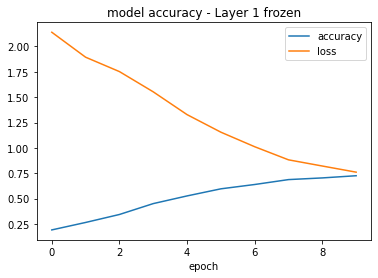

In [114]:
score = model_resnet50.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(hist_resnet50.history['accuracy'])
plt.plot(hist_resnet50.history['loss'])
plt.xlabel('epoch')
plt.title('model accuracy - Layer 1 frozen')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [117]:
model_resnet50.layers[1].trainable=True
model_resnet50.layers[3].trainable=False

model_resnet50.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

model_resnet50.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_66 (Dense)            (None, 128)               262272    
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 10)                650       
                                                           

In [118]:
callback_acc = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

history_resnet = model_resnet50.fit(train_datagen, epochs=epochs,
             validation_data=val_datagen, callbacks=[callback_acc])

Epoch 1/10


2022-05-14 15:17:42.487820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 1.8676 - accuracy: 0.4619

2022-05-14 15:20:01.912460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 157s 578ms/step - loss: 1.8676 - accuracy: 0.4619 - val_loss: 1.2519 - val_accuracy: 0.4978
Epoch 2/10
261/261 [==============================] - 150s 574ms/step - loss: 0.6374 - accuracy: 0.7751 - val_loss: 0.4386 - val_accuracy: 0.8405
Epoch 3/10
261/261 [==============================] - 151s 577ms/step - loss: 0.2931 - accuracy: 0.9040 - val_loss: 0.3188 - val_accuracy: 0.8966
Epoch 4/10
261/261 [==============================] - 153s 588ms/step - loss: 0.0993 - accuracy: 0.9732 - val_loss: 0.2646 - val_accuracy: 0.9203
Epoch 5/10
261/261 [==============================] - 151s 580ms/step - loss: 0.0403 - accuracy: 0.9909 - val_loss: 0.2509 - val_accuracy: 0.9210
Epoch 6/10
261/261 [==============================] - 151s 579ms/step - loss: 0.3846 - accuracy: 0.8975 - val_loss: 1.6341 - val_accuracy: 0.3872
Epoch 7/10
261/261 [==============================] - 147s 561ms/step - loss: 0.5188 - accuracy: 0.8199 - val_loss: 0.2832 - val_accura

2022-05-14 15:37:50.142652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test loss: 0.003857143921777606
Test accuracy: 1.0


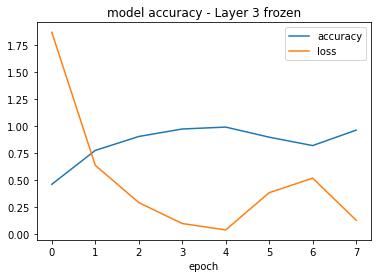

In [119]:
score = model_resnet50.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['loss'])
plt.xlabel('epoch')
plt.title('model accuracy - Layer 3 frozen')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()

In [120]:
model_resnet50.layers[3].trainable=True
model_resnet50.layers[4].trainable=False

model_resnet50.compile(optimizer=keras.optimizers.Adam(1e-5),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])

model_resnet50.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_66 (Dense)            (None, 128)               262272    
                                                                 
 dense_67 (Dense)            (None, 64)                8256      
                                                                 
 dense_68 (Dense)            (None, 10)                650       
                                                           

In [121]:
callback_acc = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

hist_resnet = model_resnet50.fit(train_datagen, epochs=epochs,
             validation_data=val_datagen, callbacks=[callback_acc])

Epoch 1/10


2022-05-14 15:37:53.587296: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - ETA: 0s - loss: 0.1217 - accuracy: 0.9660

2022-05-14 15:40:13.172311: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


261/261 [==============================] - 156s 578ms/step - loss: 0.1217 - accuracy: 0.9660 - val_loss: 0.4077 - val_accuracy: 0.8894
Epoch 2/10
261/261 [==============================] - 151s 580ms/step - loss: 0.0847 - accuracy: 0.9784 - val_loss: 0.1535 - val_accuracy: 0.9555
Epoch 3/10
261/261 [==============================] - 152s 583ms/step - loss: 0.0286 - accuracy: 0.9921 - val_loss: 0.2874 - val_accuracy: 0.9296
Epoch 4/10
261/261 [==============================] - 152s 583ms/step - loss: 0.0049 - accuracy: 0.9993 - val_loss: 0.1666 - val_accuracy: 0.9626
Epoch 5/10
261/261 [==============================] - 154s 589ms/step - loss: 0.0535 - accuracy: 0.9820 - val_loss: 0.1808 - val_accuracy: 0.9626
Epoch 6/10
261/261 [==============================] - 152s 582ms/step - loss: 7.9558e-04 - accuracy: 1.0000 - val_loss: 0.1300 - val_accuracy: 0.9662
Epoch 7/10
261/261 [==============================] - 153s 586ms/step - loss: 1.7169e-04 - accuracy: 1.0000 - val_loss: 0.1313 - va

2022-05-14 16:00:46.858133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test loss: 0.00042600714368745685
Test accuracy: 1.0


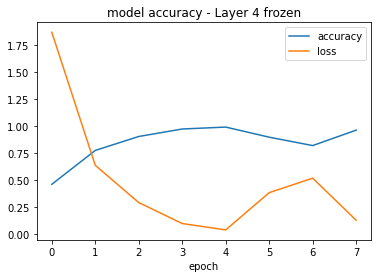

In [122]:
score = model_resnet50.evaluate(test_images, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['loss'])
plt.xlabel('epoch')
plt.title('model accuracy - Layer 4 frozen')
plt.legend(['accuracy', 'loss'], loc='upper right')
plt.show()